In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/archive.zip'

In [4]:
import zipfile
import os

# Define the file path and extraction directory
zip_file_path = '/content/drive/MyDrive/archive.zip'
extract_to = '/content'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)

Files extracted to: /content


In [5]:
TRAIN_DIR = '/content/archive/train/'
VALIDATION_DIR = '/content/archive/test/'

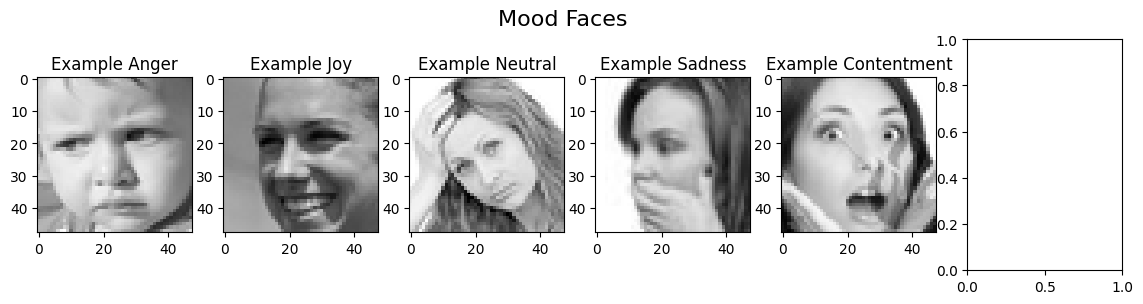

In [6]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Mood Faces', fontsize=16)

for ii, faces in enumerate(['Anger',  'Joy', 'Neutral', 'Sadness', 'Contentment']):
    dir = f'./archive/train/{faces}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example {faces}')

In [7]:
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (48, 48, 3)


In [8]:
sample_array[0,:5]

array([[144., 144., 144.],
       [105., 105., 105.],
       [ 98.,  98.,  98.],
       [ 90.,  90.,  90.],
       [ 78.,  78.,  78.]], dtype=float32)

In [9]:
def train_val_datasets():
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(48, 48),
		label_mode='categorical',
        color_mode = "grayscale",
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(48, 48),
		label_mode='categorical',
        color_mode = "grayscale",
    )

    return train_dataset, validation_dataset

In [10]:
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")

Found 24176 files belonging to 5 classes.
Found 6043 files belonging to 5 classes.
Images of train dataset have shape: (None, 48, 48, 1)
Labels of train dataset have shape: (None, 5)
Images of validation dataset have shape: (None, 48, 48, 1)
Labels of validation dataset have shape: (None, 5)


In [19]:
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.Model: CNN for multi-class classification
    """
    # Define the model
    model = tf.keras.models.Sequential([
        # Input layer for grayscale images
        tf.keras.Input(shape=(48, 48, 1)),

        # Block 1
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # Block 2
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Block 3
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global average pooling
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully connected layers
        tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        # Output layer for 5 classes
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [20]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [21]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 48, 48, 1)
Output shape: (None, 5)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,181,893 (4.51 MB)

 Trainable params: 1,179,845 (4.50 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [23]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 5)


In [24]:
history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.2442 - loss: 3.9244 - val_accuracy: 0.3708 - val_loss: 3.0884
Epoch 2/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.3671 - loss: 3.1847 - val_accuracy: 0.5186 - val_loss: 2.5520
Epoch 3/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4921 - loss: 2.5582 - val_accuracy: 0.6002 - val_loss: 2.0902
Epoch 4/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.5563 - loss: 2.1455 - val_accuracy: 0.6067 - val_loss: 1.8408
Epoch 5/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5957 - loss: 1.8366 - val_accuracy: 0.6383 - val_loss: 1.6006
Epoch 6/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.6237 - loss: 1.6114 - val_accuracy: 0.6543 - val_loss: 1.4387
Epoch 7/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6413 - loss: 1.4463 - val_accuracy: 0.6667 - val_loss: 1.3144
Epoch 8/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6560 - loss: 1.3309 - 

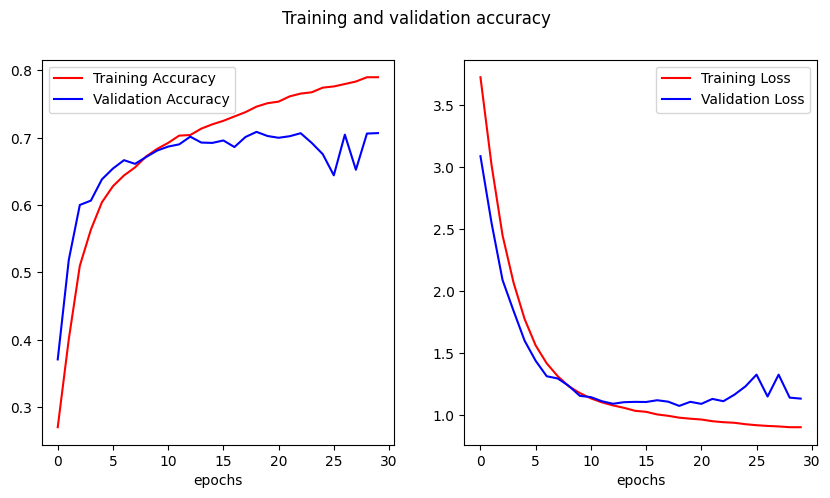

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [18]:
# Save the model in HDF5 format
model.save('my_model.h5')
